In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
from EntradaDeDadosSecaoCritica import EntradaDeDadosSecaoCritica 


In [2]:

TI = time.process_time()
# Call the data entry function
Xc, Yc, INC, Nc, gamma_c, sigma_min, sigma_max, dp, eta, F = EntradaDeDadosSecaoCritica()
# The above function is not defined in the provided code, so I'll assume these variables are globally defined
AREA = 0
Sx = 0
Sy = 0
for I in range(Nc):
    ai = Xc[I] * Yc[I+1] - Xc[I+1] * Yc[I]
    AREA += ai
    Sx += ai * (Yc[I] + Yc[I+1])
    Sy += ai * (Xc[I] + Xc[I+1])
AREA /= 2
Sx /= 6
Sy /= 6
Xcg = Sy / AREA
Ycg = Sx / AREA
# Translation of coordinates
for I in range(Nc+1):
    Xc[I] -= Xcg
    Yc[I] -= Ycg
AREA = 0
Sx = 0
Sy = 0
Ixx = 0
Iyy = 0
Ixy = 0
for I in range(Nc):
    ai = Xc[I] * Yc[I+1] - Xc[I+1] * Yc[I]
    AREA += ai
    Sx += ai * (Yc[I] + Yc[I+1])
    Sy += ai * (Xc[I] + Xc[I+1])
    Ixx += ai * (Yc[I]**2 + Yc[I] * Yc[I+1] + Yc[I+1]**2)
    Iyy += ai * (Xc[I]**2 + Xc[I] * Xc[I+1] + Xc[I+1]**2)
    Ixy += ai * (Xc[I] * Yc[I+1] + 2 * (Xc[I] * Yc[I] + Xc[I+1] * Yc[I+1]) + Xc[I+1] * Yc[I])
SINAL_DA_CIRCUICAO = AREA
if SINAL_DA_CIRCUICAO > 0:
    AREA /= 2
    Sx /= 6
    Sy /= 6
    Ixx /= 12
    Iyy /= 12
    Ixy /= 24
else:
    AREA /= -2
    Sx /= -6
    Sy /= -6
    Ixx /= -12
    Iyy /= -12
    Ixy /= -24
yb = abs(min(Yc))
yt = abs(max(Yc))
I = Ixx
Wb = I/yb
Wt = I/yt
kb = Wt/AREA
kt = Wb/AREA




In [3]:
L = 2200  # cm
q_load = 0.065  # kN/cm2
Lspan = np.linspace(0, L, L+1)
g = np.zeros((len(Lspan), len(eta)))
q = np.zeros((len(Lspan), len(eta)))
M = np.zeros((len(Lspan), len(eta)))

for z in range(len(Lspan)):
    g[z, 0] = gamma_c * AREA
    g[z, 1] = gamma_c * AREA
    q[z, 0] = 0
    q[z, 1] = q_load
    M[z, 0] = abs((g[z, 0] + q[z, 0]) * Lspan[z]**2 / 2 - gamma_c * AREA * L / 2 * Lspan[z])
    M[z, 1] = abs((g[z, 1] + q[z, 1]) * Lspan[z]**2 / 2 - (gamma_c * AREA + q_load) * L / 2 * Lspan[z])

M_cric = np.zeros(len(eta))
z_cric = np.zeros(len(eta))
coef_ang_e_min = np.zeros((2, len(eta)))
coef_ang_e_max = np.zeros((2, len(eta)))

for i in range(len(eta)):
    M_cric[i], z_cric[i] = np.max(M[:, i]), np.argmax(M[:, i])
    print(f'Fase {i+1}:')
    print(f'\tMomento fletor máximo: {M_cric[i]} kN.cm')
    print(f'\tPosição do momento fletor máximo: {Lspan[int(z_cric[i])]} cm')

    coef_ang_e_min[0, i] = (M_cric[i] + Wb * sigma_min[i]) / eta[i]
    coef_ang_e_min[1, i] = (M_cric[i] - Wt * sigma_max[i]) / eta[i]
    coef_ang_e_max[0, i] = (M_cric[i] + Wb * sigma_max[i]) / eta[i]
    coef_ang_e_max[1, i] = (M_cric[i] - Wt * sigma_min[i]) / eta[i]

# Define the range of x and y
invF = np.linspace(0, 1.5 * 1e-3, 1001)
e = np.linspace(-yt, yb, 1001)

a_e_max = np.zeros(3)
a_e_max[0] = np.min(coef_ang_e_max[0, :])
a_e_max[1] = np.min(coef_ang_e_max[1, :])

a_e_min = np.zeros(3)
a_e_min[0] = np.max(coef_ang_e_min[0, :])
a_e_min[1] = np.max(coef_ang_e_min[1, :])

b_e_min = np.zeros(3)
b_e_min[0] = -kt
b_e_min[1] = kb
b_e_min[2] = -(yt - dp)

b_e_max = np.zeros(3)
b_e_max[0] = -kt
b_e_max[1] = kb
b_e_max[2] = yb - dp

Fase 1:
	Momento fletor máximo: 54298.75000000001 kN.cm
	Posição do momento fletor máximo: 1100.0 cm
Fase 2:
	Momento fletor máximo: 93623.75 kN.cm
	Posição do momento fletor máximo: 1100.0 cm


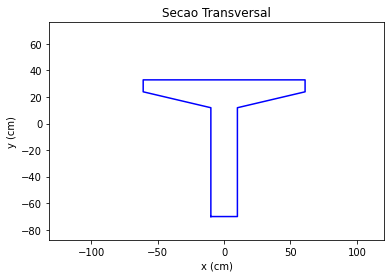

In [4]:

# Plotting
plt.figure(1)
plt.plot(Xc, Yc, '-b')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Secao Transversal')
plt.axis('equal')
plt.xlim([min(min(Xc), min(Yc))*1.25, max(max(Xc), max(Yc))*1.25])
plt.ylim([min(min(Xc), min(Yc))*1.25, max(max(Xc), max(Yc))*1.25])
plt.show()

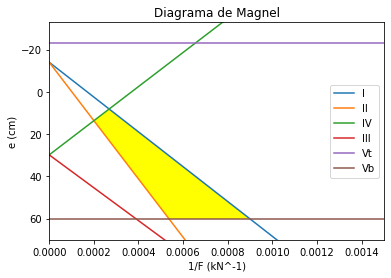

O valor máximo de F é 1114.8272017837235 kN/cm^2
O valor máximo de e é [59.9876156] cm
SOLUÇÃO CONCLUÍDA


TRABALHO COMPUTACIONAL, SEGUNDOS 0.963780927


In [5]:
# Create a grid of points
INVF, E = np.meshgrid(invF, e)

# Define the inequalities
I = E >= a_e_min[0]*INVF + b_e_min[0]
II = E <= a_e_max[0]*INVF + b_e_max[0]
III = E <= a_e_max[1]*INVF + b_e_max[1]
IV = E >= a_e_min[1]*INVF + b_e_min[1]
Vb = E <= a_e_max[2]*INVF + b_e_max[2]
Vt = E >= a_e_min[2]*INVF + b_e_min[2]

# Combine the inequalities
Z = I & II & III & IV & Vb & Vt

# Plot the region that satisfies all inequalities
plt.figure(2)
# Create a custom colormap
cmap = ListedColormap(['white', 'yellow'])
plt.imshow(Z, extent=(np.min(INVF), np.max(INVF), np.min(E), np.max(E)), origin='lower', cmap=cmap, aspect='auto')
plt.gca().invert_yaxis()

for i in range(len(eta)+1):
    plt.plot(invF, a_e_min[i]*invF + b_e_min[i])
    plt.plot(invF, a_e_max[i]*invF + b_e_max[i])

plt.xlabel('1/F (kN^-1)')
plt.ylabel('e (cm)')
plt.legend(['I','II','IV','III','Vt','Vb'])
plt.title('Diagrama de Magnel')
plt.xlim([0, np.max(invF)])
plt.ylim([-yt, yb])
plt.gca().invert_yaxis()
plt.show()

# Find the indices where Z is true
indices = np.where(Z)

# Get the corresponding values of INVF
INVF_values = INVF[indices]

# Find the maximum value
max_INVF = np.max(INVF_values)

# Get the corresponding values of E
E_values = E[indices]

# Find the E value corresponding to the maximum INVF value
max_E_index = np.where(INVF_values == max_INVF)
max_E = E_values[max_E_index]

print(f'O valor máximo de F é {1/max_INVF} kN/cm^2')
print(f'O valor máximo de e é {max_E} cm')

print('SOLUÇÃO CONCLUÍDA\n\n')
TF = time.process_time()
print(f'TRABALHO COMPUTACIONAL, SEGUNDOS {TF - TI}')